In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import copy

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [54]:
df=pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [55]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [56]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [57]:
df=df.dropna()

In [58]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [59]:
df=df.drop('id',axis=1)

In [60]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Number of postive and negative samples in the dataset

In [61]:
print(sum(df.stroke == 1))
print(sum(df.stroke == 0))

209
4700


In [62]:
def ohe(df):
    x=pd.get_dummies(df)
    x=x.iloc[:,:-1]
    return x

In [63]:
x=ohe(df['gender'])
df.drop('gender',axis=1,inplace=True)
df=pd.concat([df,x],axis=1)


In [64]:
df['ever_married']=df['ever_married'].replace(['Yes','No'],[1,0])

In [65]:
df['Residence_type']=df['Residence_type'].replace(['Rural','Urban'],[1,0])

In [66]:
x=ohe(df['work_type'])
df.drop('work_type',axis=1,inplace=True)
df=pd.concat([df,x],axis=1)

In [67]:
df['smoking_status']=df['smoking_status'].replace(['formerly smoked','never smoked','smokes','Unknown'],[1,0,2,-9])

In [68]:
df

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Govt_job,Never_worked,Private,Self-employed
0,67.0,0,1,1,0,228.69,36.6,1,1,0,1,0,0,1,0
2,80.0,0,1,1,1,105.92,32.5,0,1,0,1,0,0,1,0
3,49.0,0,0,1,0,171.23,34.4,2,1,1,0,0,0,1,0
4,79.0,1,0,1,1,174.12,24.0,0,1,1,0,0,0,0,1
5,81.0,0,0,1,0,186.21,29.0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,0,1,103.08,18.6,-9,0,1,0,0,0,0,0
5106,81.0,0,0,1,0,125.20,40.0,0,0,1,0,0,0,0,1
5107,35.0,0,0,1,1,82.99,30.6,0,0,1,0,0,0,0,1
5108,51.0,0,0,1,1,166.29,25.6,1,0,0,1,0,0,1,0


In [69]:
X=df.drop('stroke',axis=1)
y=df['stroke']

In [70]:
print(sum(y == 0))
print(sum(y == 1))

4700
209


In [71]:
temp = copy.deepcopy(X)
print(temp.shape[0])
print(temp.drop_duplicates().shape[0])
print(X.nunique())
print("")

X_1 = X[y == 1]
temp = copy.deepcopy(X_1)
print(temp.shape[0])
print(temp.drop_duplicates().shape[0])
print(X_1.nunique())

4909
4909
age                   104
hypertension            2
heart_disease           2
ever_married            2
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
Female                  2
Male                    2
Govt_job                2
Never_worked            2
Private                 2
Self-employed           2
dtype: int64

209
209
age                   43
hypertension           2
heart_disease          2
ever_married           2
Residence_type         2
avg_glucose_level    209
bmi                  135
smoking_status         4
Female                 2
Male                   2
Govt_job               2
Never_worked           1
Private                2
Self-employed          2
dtype: int64


In [72]:

# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# class0 = sum(y == 0)
# class1 = sum(y == 1)

# class0_ratio = 0.65
# class1_ratio = 10

# # Create SMOTE object with desired sampling strategy
# smote = SMOTE(sampling_strategy={0: class0, 1: int(class1 * class1_ratio)}, random_state=42)

# # Apply SMOTE to oversample the minority class
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Create RandomUnderSampler object with desired sampling strategy
# rus = RandomUnderSampler(sampling_strategy={0: int(class0 * class0_ratio), 1: int(class1 * class1_ratio)}, random_state=42)

# # Apply RandomUnderSampler to undersample the majority class
# X, y = rus.fit_resample(X_resampled, y_resampled)

In [73]:
print(sum(y == 0))
print(sum(y == 1))

4700
209


In [74]:
temp = copy.deepcopy(X)
print(temp.shape[0])
print(temp.drop_duplicates().shape[0])
print(X.nunique())
print("")

X_1 = X[y == 1]
temp = copy.deepcopy(X_1)
print(temp.shape[0])
print(temp.drop_duplicates().shape[0])
print(X_1.nunique())

4909
4909
age                   104
hypertension            2
heart_disease           2
ever_married            2
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
Female                  2
Male                    2
Govt_job                2
Never_worked            2
Private                 2
Self-employed           2
dtype: int64

209
209
age                   43
hypertension           2
heart_disease          2
ever_married           2
Residence_type         2
avg_glucose_level    209
bmi                  135
smoking_status         4
Female                 2
Male                   2
Govt_job               2
Never_worked           1
Private                2
Self-employed          2
dtype: int64


In [76]:
import xgboost
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
train_data = X
train_target = y

estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select=5, step=1)
selector.fit(train_data, train_target)
rfe_train_data = train_data.iloc[:, selector.support_]

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(rfe_train_data,y,test_size=0.2,shuffle=True)

# Smote on train set

In [81]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

class0 = sum(y_train == 0)
class1 = sum(y_train == 1)

class0_ratio = 0.65
class1_ratio = 10

# Create SMOTE object with desired sampling strategy
smote = SMOTE(sampling_strategy={0: class0, 1: int(class1 * class1_ratio)}, random_state=42)

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create RandomUnderSampler object with desired sampling strategy
rus = RandomUnderSampler(sampling_strategy={0: int(class0 * class0_ratio), 1: int(class1 * class1_ratio)}, random_state=42)

# Apply RandomUnderSampler to undersample the majority class
X_train, y_train = rus.fit_resample(X_resampled, y_resampled)

In [82]:
print(sum(y_train == 0))
print(sum(y_train == 1))

2443
1680


In [83]:
rfe_train_data

,age,Residence_type,avg_glucose_level,bmi,smoking_status
0,67.0,0,228.69,36.6,1
2,80.0,1,105.92,32.5,0
3,49.0,0,171.23,34.4,2
4,79.0,1,174.12,24.0,0
5,81.0,0,186.21,29.0,1
...,...,...,...,...,...
5104,13.0,1,103.08,18.6,-9
5106,81.0,0,125.20,40.0,0
5107,35.0,1,82.99,30.6,0
5108,51.0,1,166.29,25.6,1


# Smote on test set

In [85]:
print(sum(y_test == 0))
print(sum(y_test == 1))

941
41


In [86]:
class0 = sum(y_test == 0)
class1 = sum(y_test == 1)

class0_ratio = 0.65
class1_ratio = 10

# Create SMOTE object with desired sampling strategy
smote = SMOTE(sampling_strategy={0: class0, 1: int(class1 * class1_ratio)}, random_state=42)

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X_test, y_test)

# Create RandomUnderSampler object with desired sampling strategy
rus = RandomUnderSampler(sampling_strategy={0: int(class0 * class0_ratio), 1: int(class1 * class1_ratio)}, random_state=42)

# Apply RandomUnderSampler to undersample the majority class
X_test, y_test = rus.fit_resample(X_resampled, y_resampled)

In [87]:
print(sum(y_test == 0))
print(sum(y_test == 1))

611
410


Perform grid search to find the best set of params to train the model.

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

Print the best grid search parameters.

In [89]:
print(grid_search.best_params_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [90]:
rf = RandomForestClassifier(n_estimators=grid_search.best_params_["n_estimators"],
                            min_samples_split = grid_search.best_params_["min_samples_split"],
                            min_samples_leaf = grid_search.best_params_["min_samples_leaf"],
                            max_depth = grid_search.best_params_["max_depth"])
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [91]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Get the predicted class labels
y_pred = rf.predict(X_test)

y_prob = rf.predict_proba(X_test)

# Get the predicted positive class probabilities
y_prob_pos = y_prob[:, 1]

# Create a binary column with actual labels
y_actual = np.where(y_test == 'positive', 1, 0)

rf.score(X_test,y_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

# Print the results
print("Predicted Probabilities:", y_prob)
print("Predicted Class Labels:", y_pred)
print("Predicted Positive Class Probabilities:", y_prob_pos)
print("Actual Labels:", y_actual)

Accuracy: 0.7590597453476984
Precision: 0.777600323461033
Recall: 0.7192567162987505
F1 score: 0.7267677646751665
Predicted Probabilities: [[0.995 0.005]
 [0.99  0.01 ]
 [0.275 0.725]
 ...
 [0.395 0.605]
 [0.86  0.14 ]
 [0.295 0.705]]
Predicted Class Labels: [0 0 1 ... 1 0 1]
Predicted Positive Class Probabilities: [0.005 0.01  0.725 ... 0.605 0.14  0.705]
Actual Labels: [0 0 0 ... 0 0 0]


In [92]:
import pandas as pd

# Assuming that you have already obtained the predicted positive class probabilities and actual labels

# Create a dataframe with predicted positive class probabilities and actual labels
prob_df = pd.DataFrame({"p": y_prob_pos, "y": y_actual})

# Print the resulting dataframe
print(prob_df.head())

       p  y
0  0.005  0
1  0.010  0
2  0.725  0
3  0.220  0
4  0.015  0


Plot ROC curve and confusion matrix

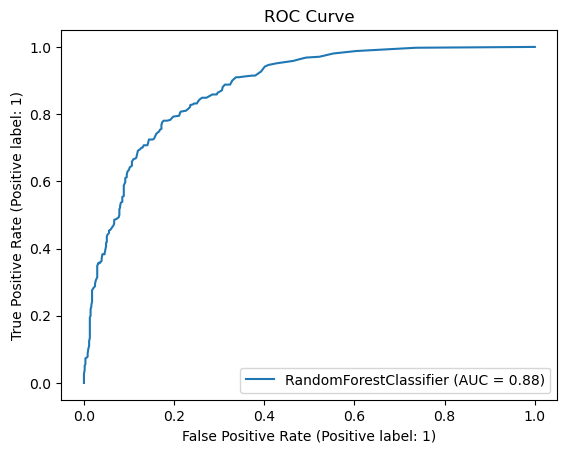

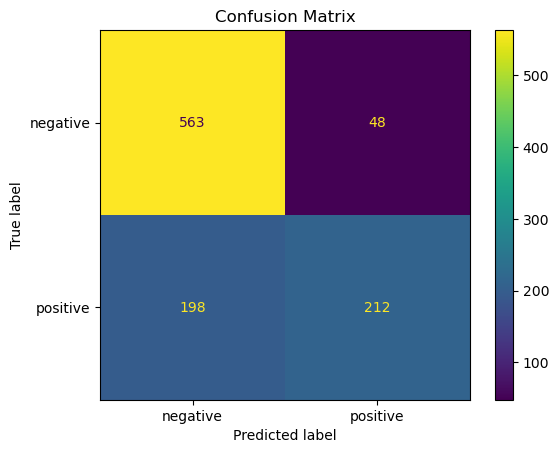

In [93]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

roc_curve_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)
roc_curve_disp.ax_.set_title('ROC Curve')

confusion_matrix_disp = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test,
                                                              display_labels=['negative', 'positive'])
confusion_matrix_disp.ax_.set_title('Confusion Matrix')
plt.show()


Plot precision-recall curve

In [94]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate predictions
y_pred = rf.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate MCC
def mcc(cm):
    tp = cm[1,1]
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]

    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

    if denominator == 0:
        return 0

    return numerator / denominator

mcc_value = mcc(cm)

print("MCC:", mcc_value)

MCC: 0.49341964032874536


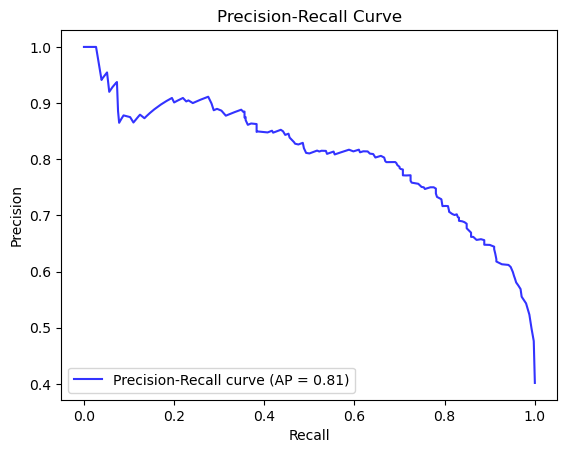

In [95]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

y_pred = rf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

plt.plot(recall, precision, color='b', alpha=0.8,
         label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

Area under the curve for precision-recall curve

In [96]:
from sklearn.metrics import precision_recall_curve, auc

pr_auc = auc(recall, precision)
print(pr_auc)

0.8073877515644098


Feature imporance

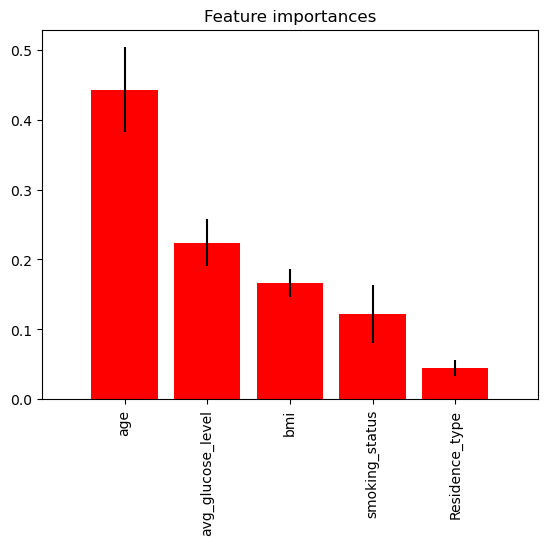

In [97]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()

Learning Curve

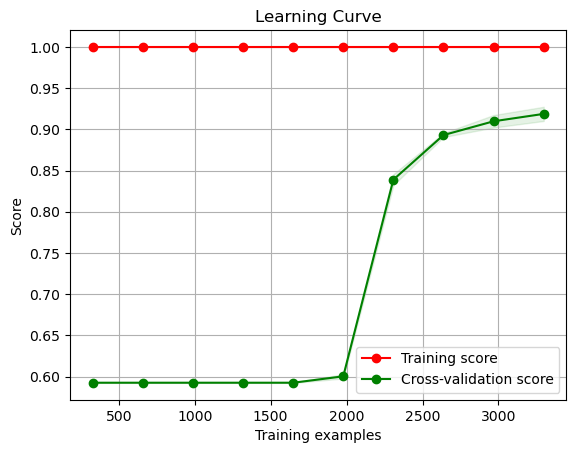

In [99]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=rf,
                                                        X=X_train,
                                                        y=y_train,
                                                        cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.legend(loc="best")
plt.show()

Calibration curve

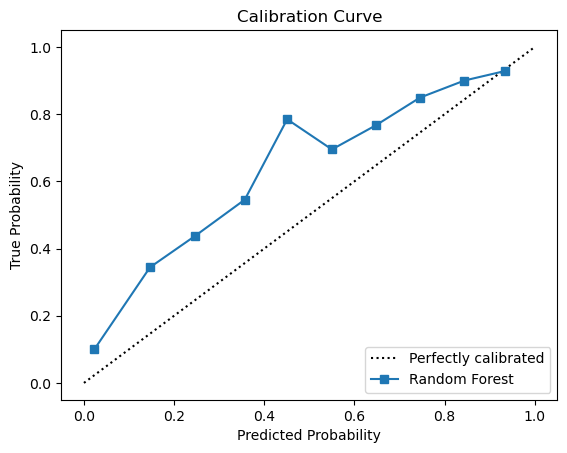

In [100]:
from sklearn.calibration import calibration_curve

y_prob = rf.predict_proba(X_test)[:, 1]
true_prob, pred_prob = calibration_curve(y_test, y_prob, n_bins=10)

plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.plot(pred_prob, true_prob, "s-", label="%s" % "Random Forest")
plt.ylabel("True Probability")
plt.xlabel("Predicted Probability")
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.title('Calibration Curve')
plt.show()

(array([361.,  90.,  62.,  38.,  50.,  40.,  22.,  28.,  37.,  30.,  31.,
         31.,  32.,  28.,  30.,  20.,  39.,  23.,  23.,   6.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 [<matplotlib.patches.Polygon at 0x7d1049e23290>])

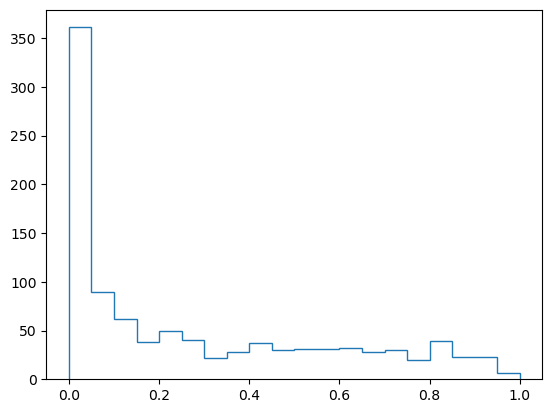

In [105]:
import matplotlib.pyplot as plt
plt.hist(y_prob, bins=20, histtype='step')
